In [4]:
import pandas as pd
from  pandas_profiling import ProfileReport as pr #data visualization
import matplotlib.pyplot as mp
import statsmodels.api as sm
import seaborn as sb
import datetime
import sweetviz as sv #for data visualization
sb.set(rc={"figure.dpi":400, 'savefig.dpi':400})

In [5]:
cab_data = pd.read_csv('Cab_Data.csv')
city_list = pd.read_csv('City.csv')
customer_id_data = pd.read_csv('Customer_ID.csv')
transaction_id_data = pd.read_csv('Transaction_ID.csv')

 #Data Conversion for cab_data (from xlsx to datetime)
cab_data['Date of Travel'] = pd.to_datetime(cab_data['Date of Travel'],
                                                  unit = 'D',
                                                  origin = '1899-12-30')

    #Develop Profile Reports for the datasets
# pr(cab_data).to_file('cab_data_pr.html')
# pr(customer_id_data).to_file('customer_id_data_pr.html')
# pr(cab_data).to_file('cab_data_pr.html')
# pr(city_list).to_file('city_list_pr.html')

#     #Develop comparative analysis for the datasets
# sv.compare(cab_data,transaction_id_data).show_html('cab_transaction_comp.html')

   

In [6]:

print('cab_data')
print(cab_data.info(),cab_data.describe())


cab_data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Transaction ID  359392 non-null  int64         
 1   Date of Travel  359392 non-null  datetime64[ns]
 2   Company         359392 non-null  object        
 3   City            359392 non-null  object        
 4   KM Travelled    359392 non-null  float64       
 5   Price Charged   359392 non-null  float64       
 6   Cost of Trip    359392 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 19.2+ MB
None        Transaction ID   KM Travelled  Price Charged   Cost of Trip
count    3.593920e+05  359392.000000  359392.000000  359392.000000
mean     1.022076e+07      22.567254     423.443311     286.190113
std      1.268058e+05      12.233526     274.378911     157.993661
min      1.000001e+07       1.900000      15.6000

In [7]:
  #merge cab_data & transaction_data by Transaction ID
data_merge = pd.merge(
    cab_data,
    transaction_id_data,
    left_on = 'Transaction ID',
    right_on = 'Transaction ID',
    validate = 'one_to_one'
  )
  #merge above merged data to customer_data & sort by Transaction ID & Customer ID
main_dataset = pd.merge(
  data_merge,
  customer_id_data,
  on = 'Customer ID',
  validate = 'many_to_one'
).sort_values(
  by = ['Date of Travel', 'Customer ID']
)

# pr(main_dataset).to_file('main_dataset_pr.html')

In [8]:
main_dataset

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
10422,10000845,2016-01-02,Yellow Cab,NEW YORK NY,17.92,561.71,253.7472,9,Card,Male,32,21212
14242,10000961,2016-01-02,Yellow Cab,NEW YORK NY,19.04,634.46,253.6128,85,Card,Male,19,19765
13252,10000929,2016-01-02,Yellow Cab,NEW YORK NY,37.24,1065.31,536.2560,439,Cash,Male,22,5494
11247,10000869,2016-01-02,Yellow Cab,NEW YORK NY,3.06,104.70,36.7200,475,Cash,Male,36,9959
2025,10000145,2016-01-02,Pink Cab,NEW YORK NY,2.10,37.18,21.4200,502,Cash,Male,28,15285
...,...,...,...,...,...,...,...,...,...,...,...,...
228341,10433128,2018-12-31,Pink Cab,BOSTON MA,29.97,390.42,317.6820,59274,Card,Female,25,22928
321484,10437817,2018-12-31,Yellow Cab,BOSTON MA,38.85,504.11,540.7920,59494,Cash,Female,35,17699
306342,10433131,2018-12-31,Pink Cab,BOSTON MA,27.27,370.20,324.5130,59768,Cash,Female,25,24526
21766,10437732,2018-12-31,Yellow Cab,BOSTON MA,25.30,362.48,352.1760,59925,Cash,Male,36,24313


In [9]:
# Add features for Price per KM & Cost per KM
main_dataset_copy = main_dataset.copy() #create a copy for experimentation
price_per_km = main_dataset['Price Charged'] / main_dataset['KM Travelled']

main_dataset.insert(6, 
'Price per KM', main_dataset['Price Charged'] / main_dataset['KM Travelled'], 
True)
main_dataset.insert(8, 
'Cost per KM', main_dataset['Cost of Trip']/main_dataset['KM Travelled'], 
True)

main_dataset.head()



,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Price per KM,Cost of Trip,Cost per KM,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
10422,10000845,2016-01-02,Yellow Cab,NEW YORK NY,17.92,561.71,31.345424,253.7472,14.16,9,Card,Male,32,21212
14242,10000961,2016-01-02,Yellow Cab,NEW YORK NY,19.04,634.46,33.322479,253.6128,13.32,85,Card,Male,19,19765
13252,10000929,2016-01-02,Yellow Cab,NEW YORK NY,37.24,1065.31,28.606606,536.2560,14.40,439,Cash,Male,22,5494
11247,10000869,2016-01-02,Yellow Cab,NEW YORK NY,3.06,104.70,34.215686,36.7200,12.00,475,Cash,Male,36,9959
2025,10000145,2016-01-02,Pink Cab,NEW YORK NY,2.10,37.18,17.704762,21.4200,10.20,502,Cash,Male,28,15285


<AxesSubplot:xlabel='Company', ylabel='count'>

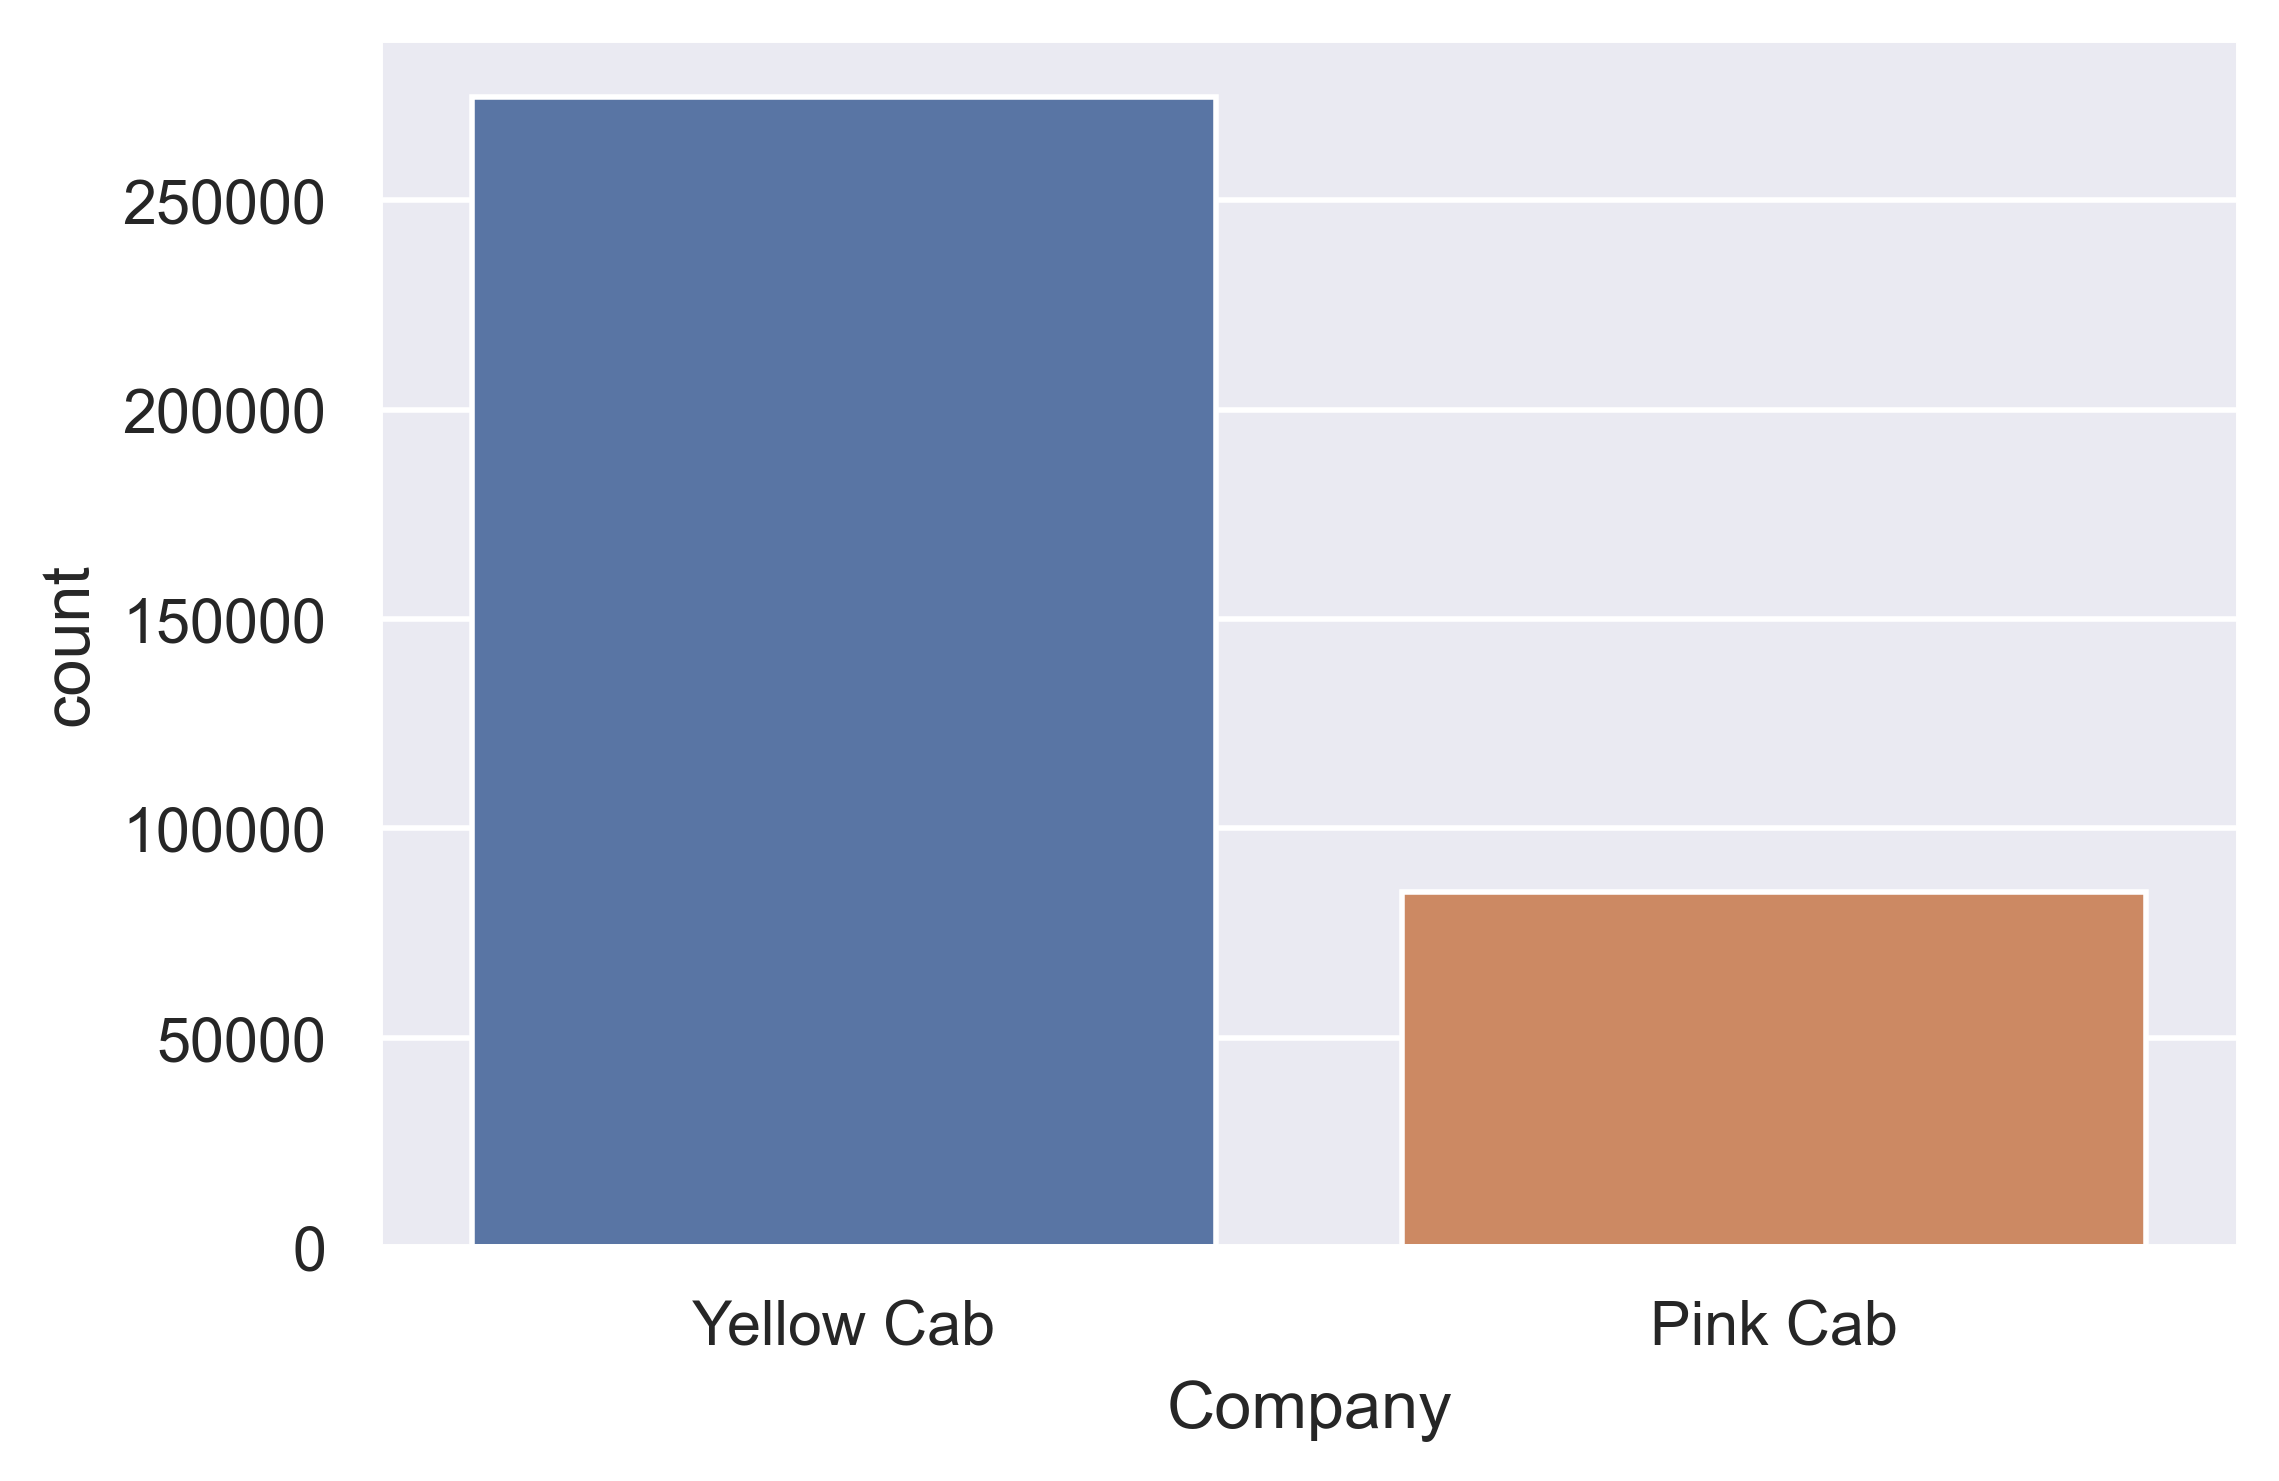

In [10]:
#Hypothesis 1: Yellow Cab has a larger market share than Pink Cab

sb.countplot(x = main_dataset.Company)
#Results of Hypothesis 1:   True.

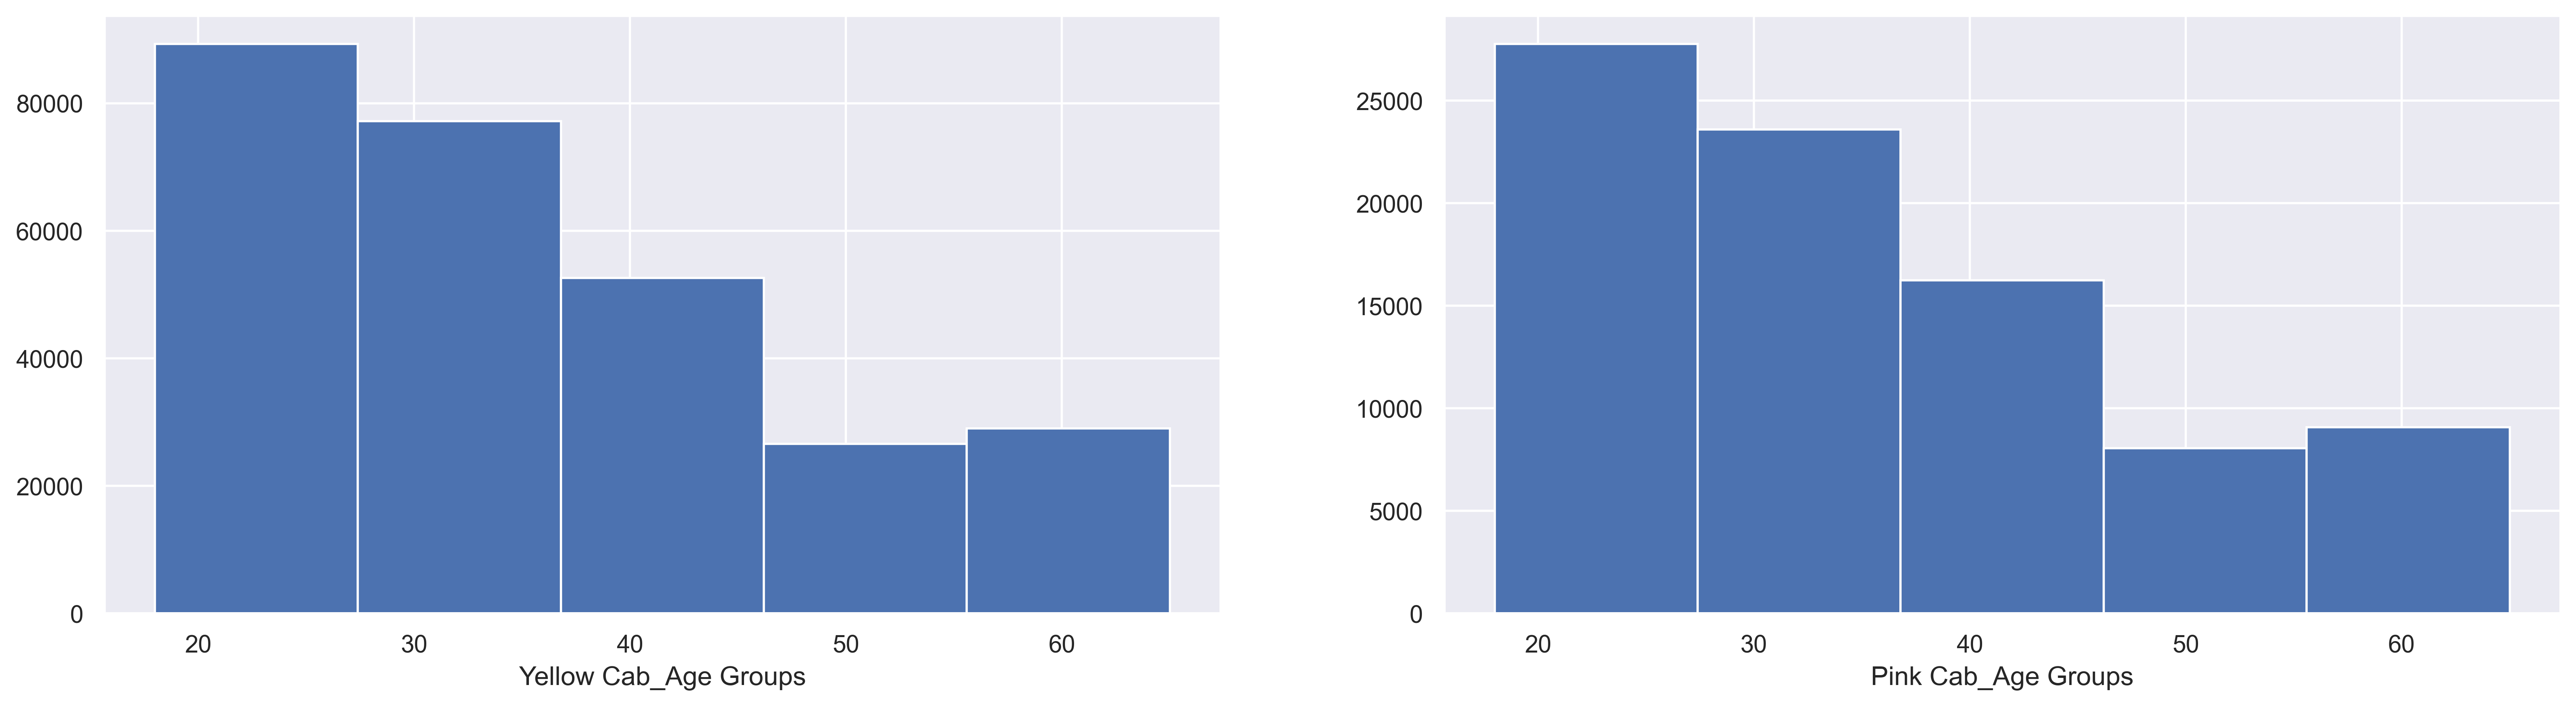

In [11]:
#Hypothesis 2: Both Cabs have similar distributed client base, based on a). age, b). gender, c). income & d). location

#a). Age
    #Define graph figure size
mp.subplots(figsize = (20, 5))

    #Plot for Yellow Cab Clients Count against Age. Bins = 5
mp.subplot(1,2,1)
mp.hist(main_dataset[main_dataset['Company'] == 'Yellow Cab']['Age'], bins = 5, edgecolor='white')
mp.xlabel('Yellow Cab_Age Groups')

    #Plot for Pink Cab Clients Count against Age. Bins = 5
mp.subplot(1,2,2)
mp.hist(main_dataset[main_dataset['Company'] == 'Pink Cab']['Age'], bins = 5, edgecolor='white')
mp.xlabel('Pink Cab_Age Groups')

mp.show()

#Results for Hypothesis 2a: True. Both Cabs have similarly distributed client base, based on Age

<AxesSubplot:xlabel='Company', ylabel='count'>

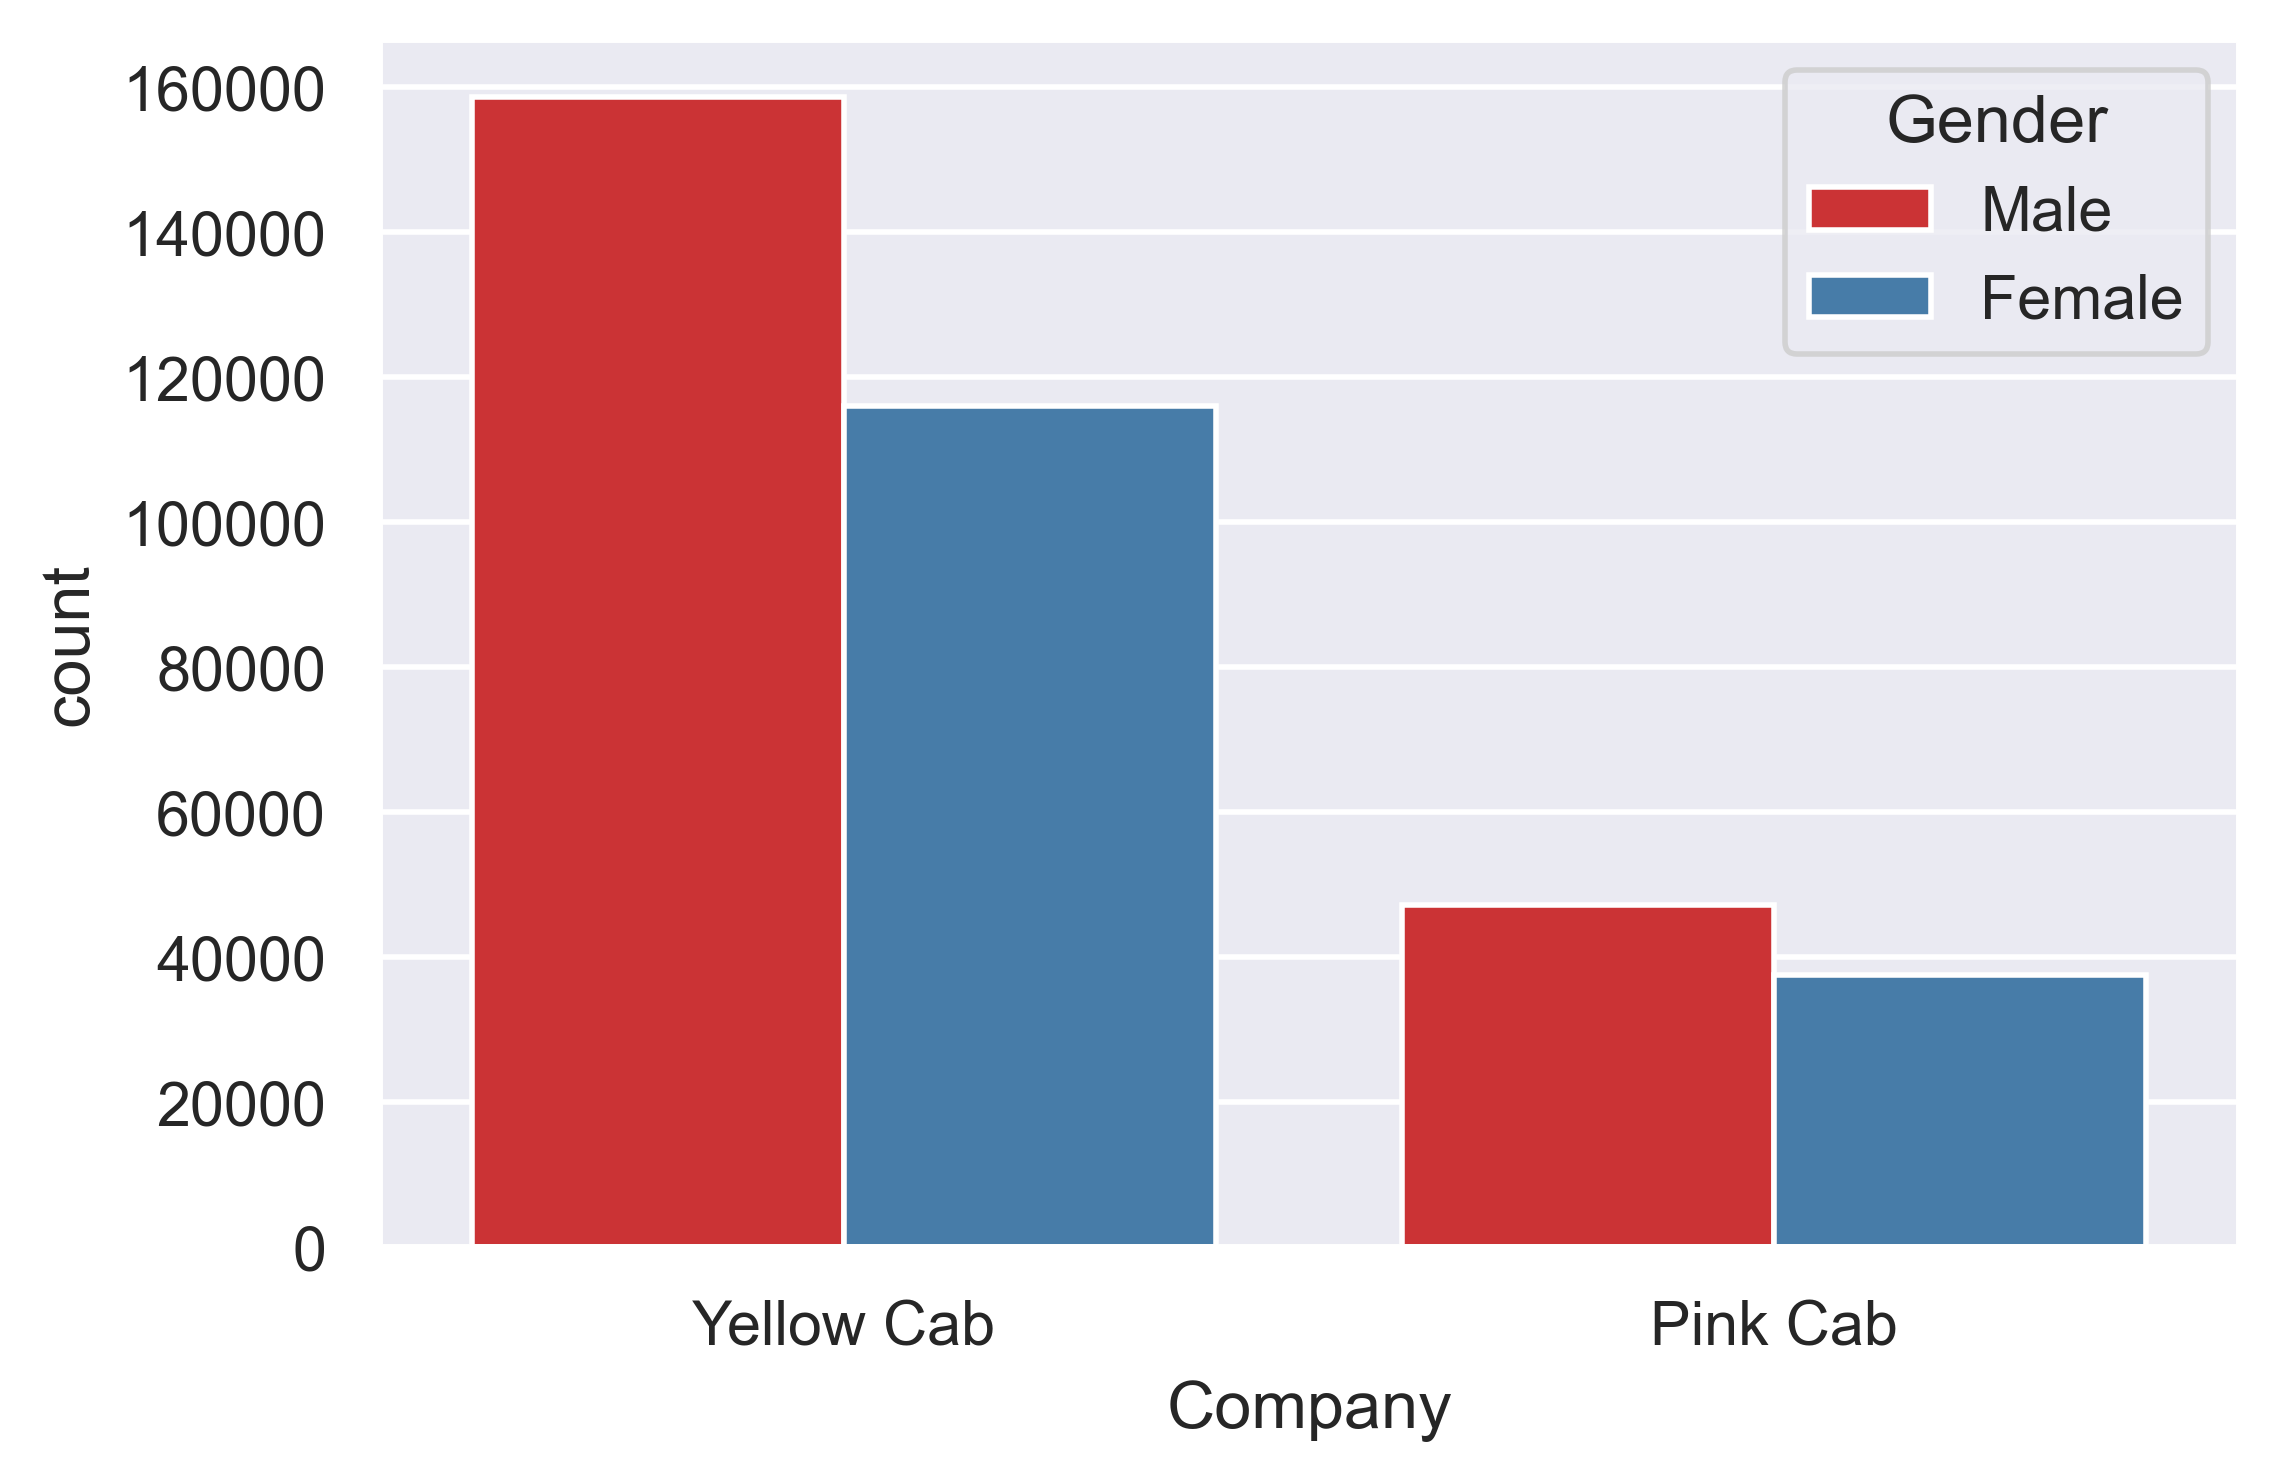

In [12]:
#b). Gender

sb.countplot(
    x = main_dataset.Company, 
    hue = main_dataset['Gender'],
    palette = 'Set1',
    )


#Result for Hypothesis 2b: True. Both Cab Companies have similar ratios in Client gender distribution  

Text(0.5, 0, 'Pink Cab_Clients Income')

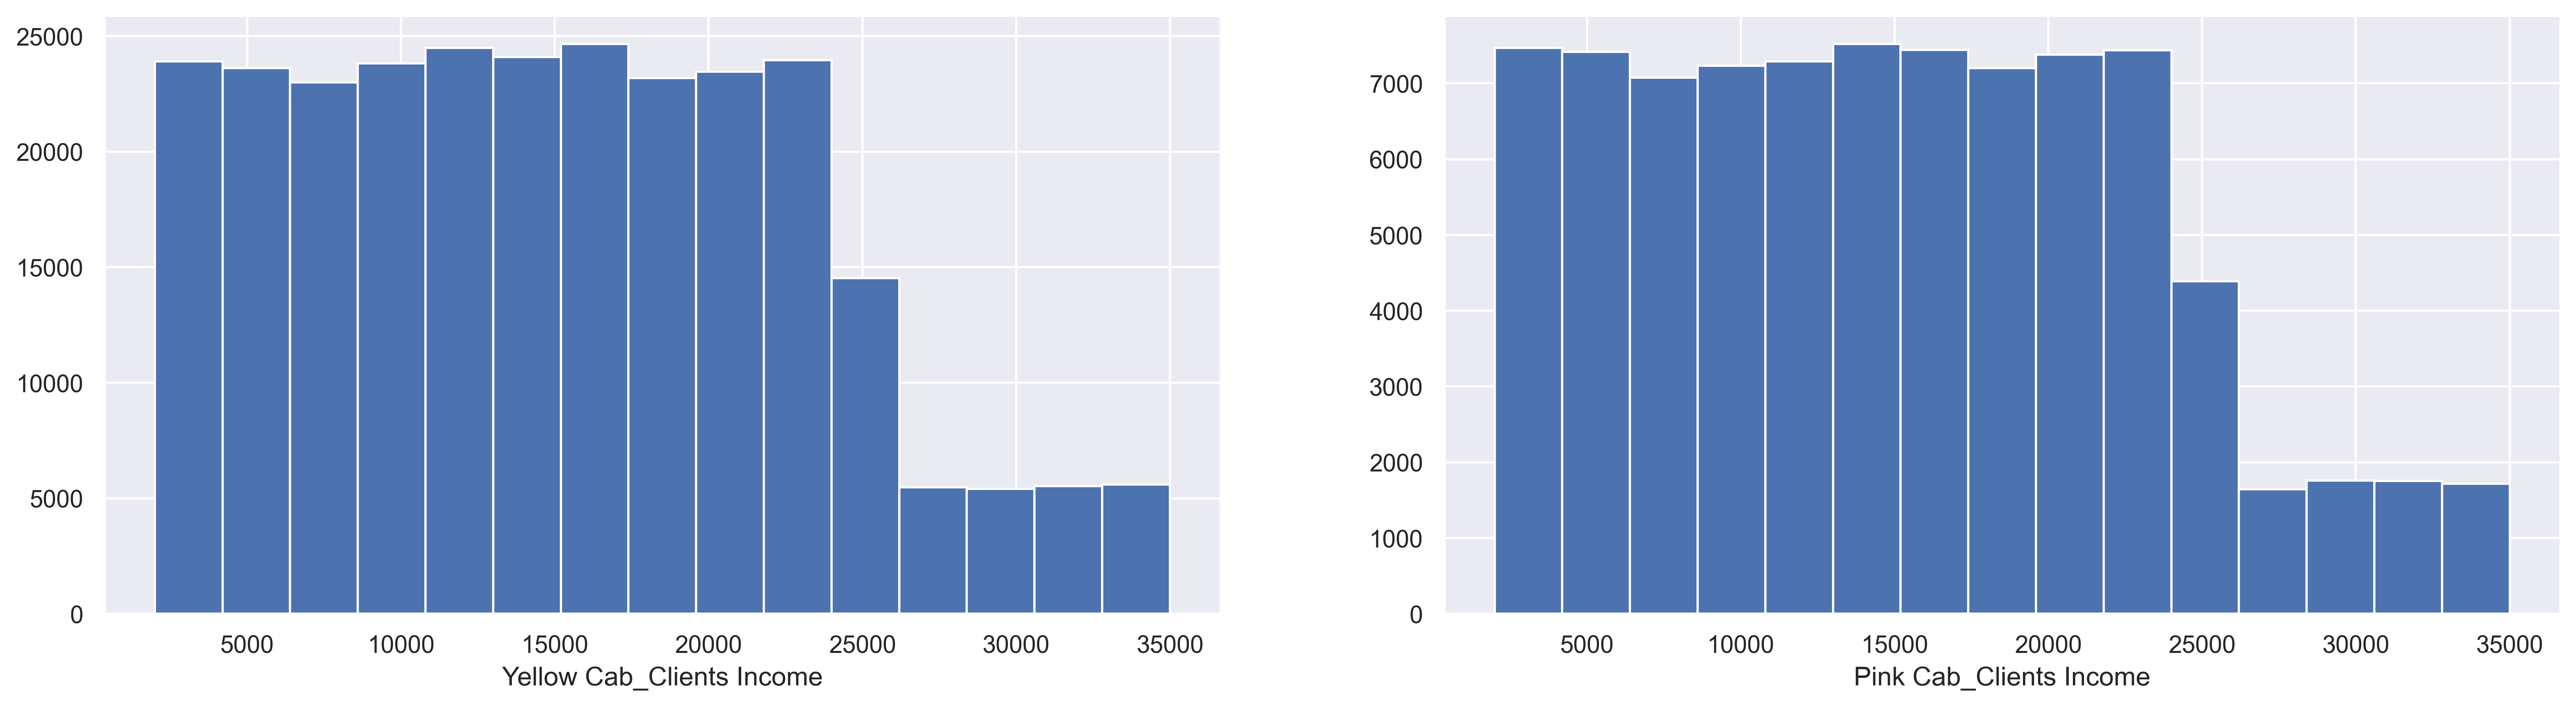

In [13]:
#c). Income

mp.subplots(figsize = (20,5))

mp.subplot(1,2,1)
mp.hist(main_dataset[main_dataset['Company'] == 'Yellow Cab']['Income (USD/Month)'], bins = 15, edgecolor = 'white')
mp.xlabel('Yellow Cab_Clients Income')


mp.subplot(1,2,2)
mp.hist(main_dataset[main_dataset['Company'] == 'Pink Cab']['Income (USD/Month)'], bins = 15, edgecolor = 'white')
mp.xlabel('Pink Cab_Clients Income')

#Results of Hypothesis 6: False. Both Cabs have a similarly distributed range of clinets based on Income


<AxesSubplot:ylabel='City'>

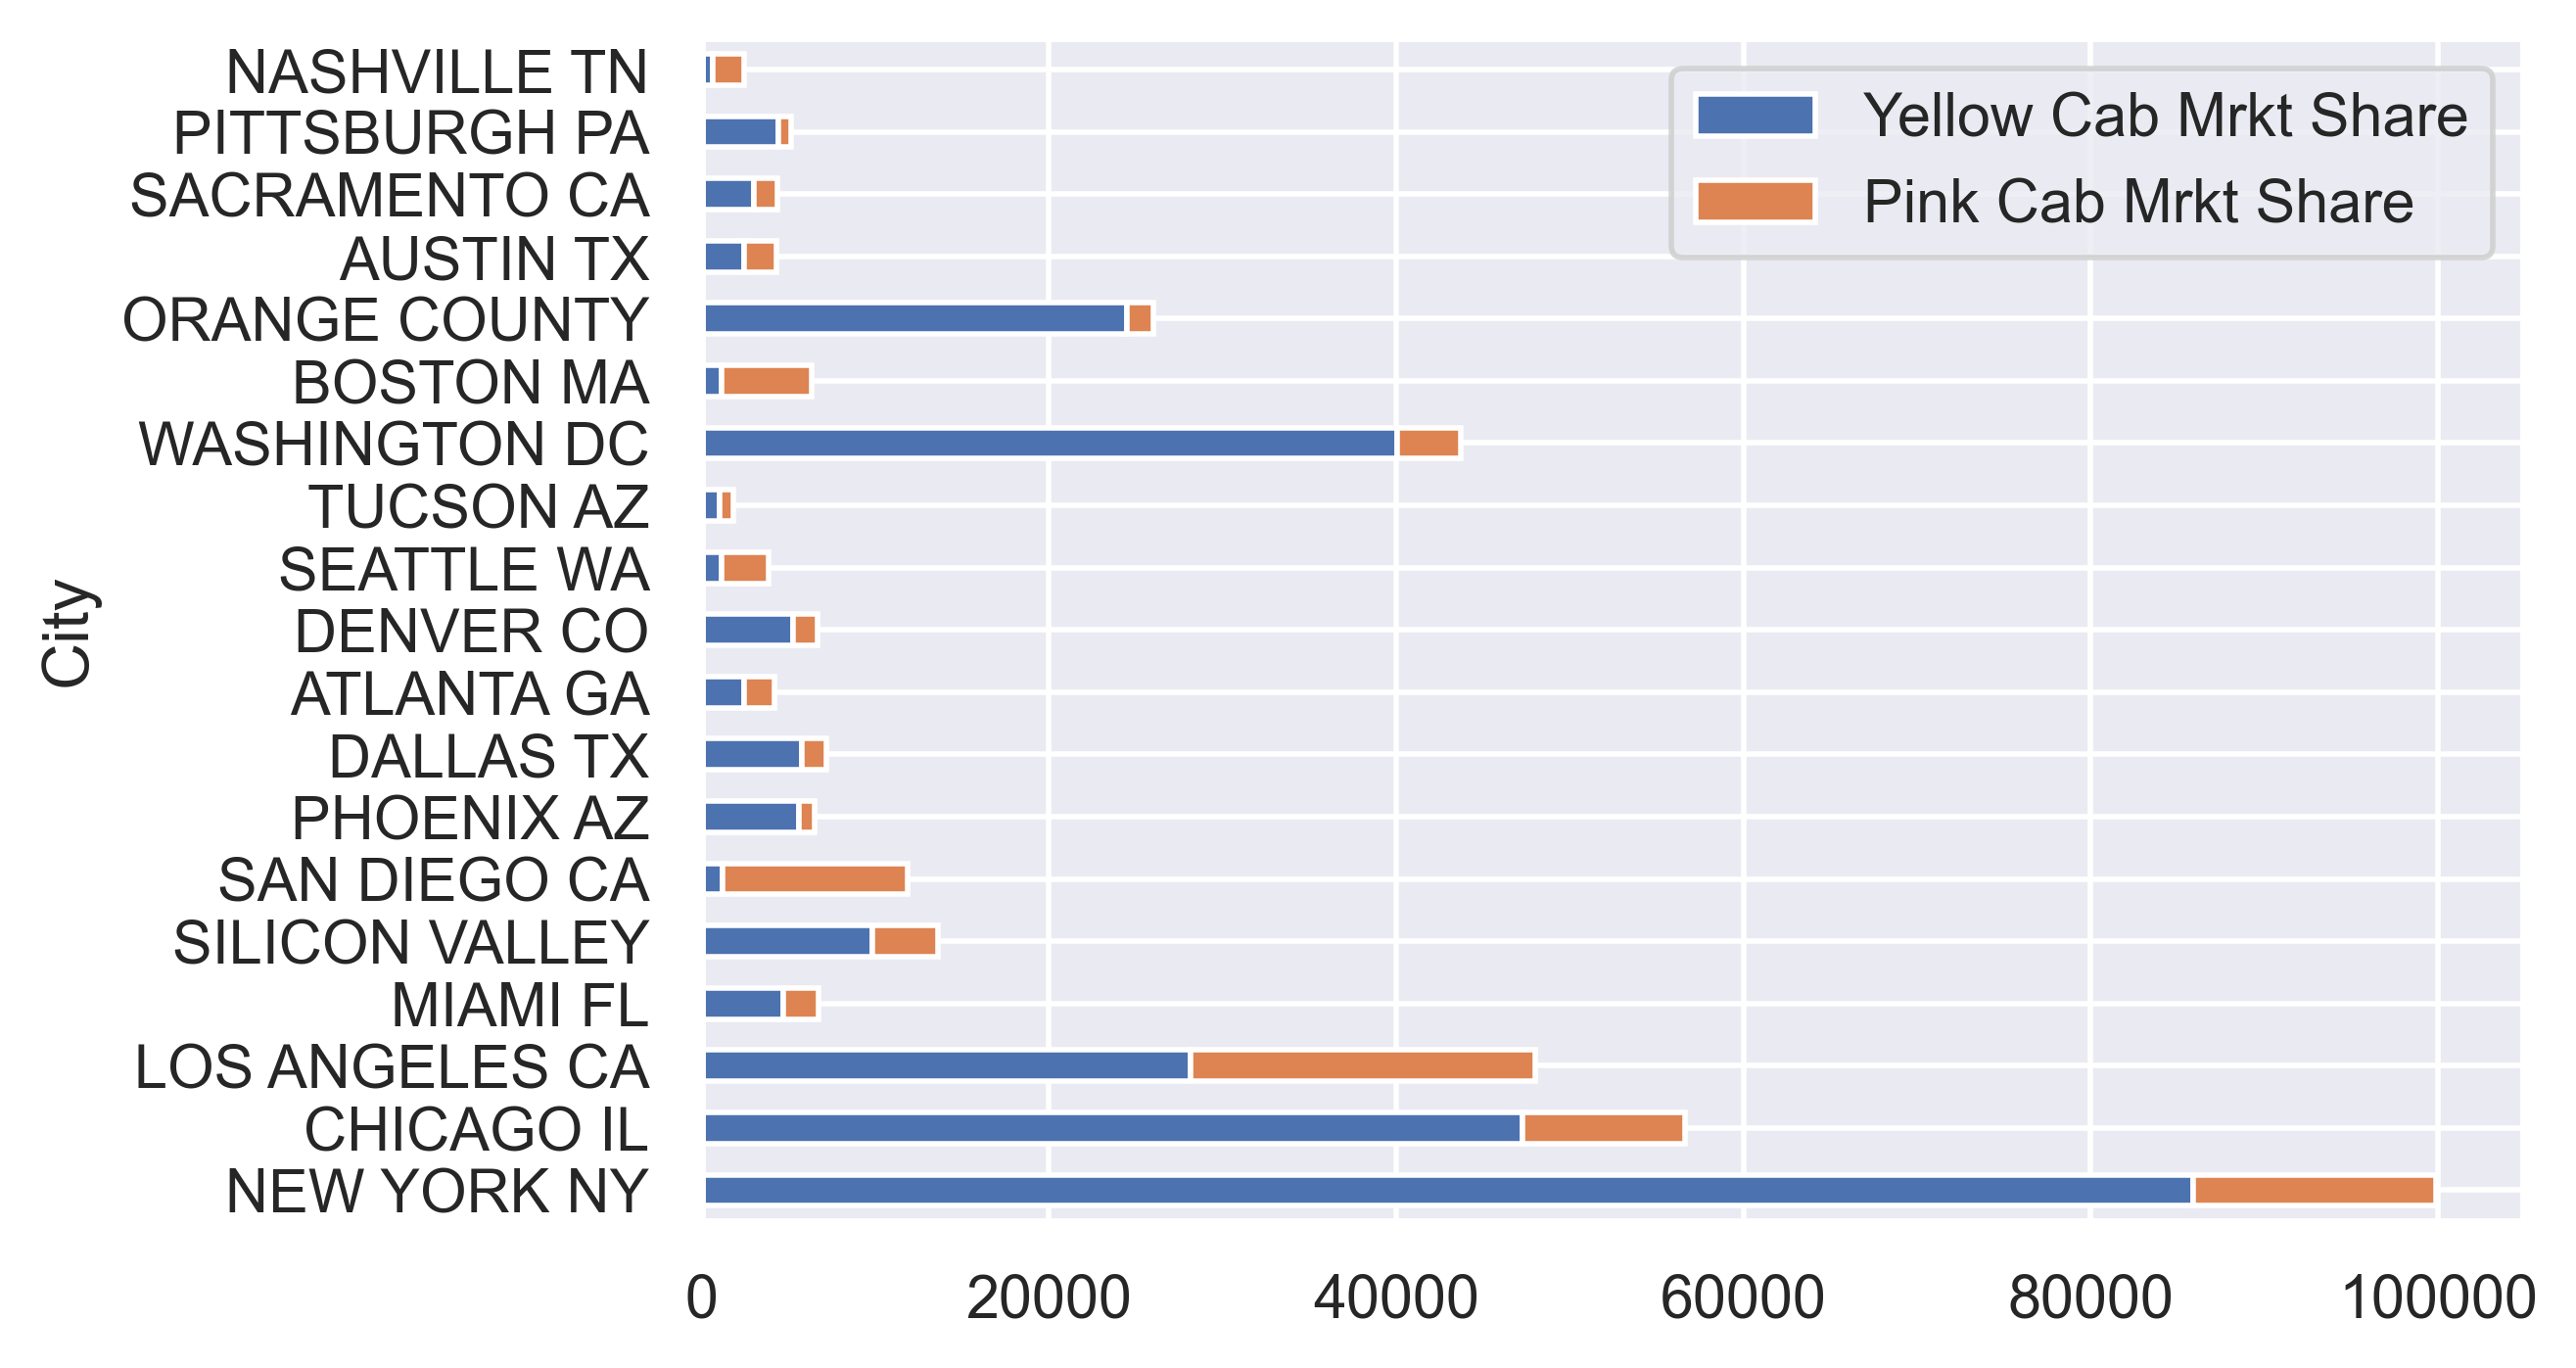

In [14]:
# d). Location



from collections import Counter
Counter(main_dataset.City).values()

#count duplicates

# fig, ax = mp.subplots()

# ax.bar(main_dataset['City'], Counter(main_dataset['City']).values(), label = "City")

    #Number of transactions per City for Yellow Cab
yellow_transactions_city = dict(Counter(main_dataset[main_dataset.Company == 'Yellow Cab'].City))
    #Number of transactions per City for Pink Cab
pink_transactions_city = dict(Counter(main_dataset[main_dataset.Company == 'Pink Cab'].City))


pd.DataFrame(
     {
    'City': list(Counter(main_dataset[main_dataset.Company == 'Pink Cab'].City).keys()),
    'Yellow Cab Mrkt Share': list(Counter(main_dataset[main_dataset.Company == 'Yellow Cab'].City).values()),
    'Pink Cab Mrkt Share': list(Counter(main_dataset[main_dataset.Company == 'Pink Cab'].City).values()),

}
).plot.barh(x = 'City', stacked = True)



#Reuslts for Hypothesis 2c:





In [15]:
# Hypothesis 3: Pink Cab charges higher per KM than Yellow Cab
# Hypothesis 4: Pink Cab has a higher Turnover per KM than Yellow Cab
# Create a merge of the describe() fn for Yellow & Pink Cabs on their Cost per KM & Price per KM
pd.merge(
    main_dataset[main_dataset['Company'] == 'Pink Cab'][['Cost per KM','Price per KM']].describe(),
    main_dataset[main_dataset['Company'] == 'Yellow Cab'][['Cost per KM', 'Price per KM']].describe(),
    right_index = True,
    left_index = True,
    suffixes = (' Pink',' Yellow')
)


#Results for Hypothesis 3: False. Pink Cab charges lower than Yellow Cab
#Results for Hypothesis 4: False. Pink Cab receives a lower Turnover per KM than Yellow Cab


,Cost per KM Pink,Price per KM Pink,Cost per KM Yellow,Price per KM Yellow
count,84711.000000,84711.000000,274681.000000,274681.000000
mean,10.998602,13.768510,13.200565,20.306073
std,0.606598,2.631528,0.726940,5.745021
min,10.000000,6.338621,12.000000,9.161765
25%,10.500000,11.937046,12.600000,15.805288
50%,11.000000,13.396096,13.200000,18.753655
75%,11.500000,15.232716,13.800000,24.100763
max,12.000000,39.046939,14.400000,53.955556


<AxesSubplot:ylabel='City'>

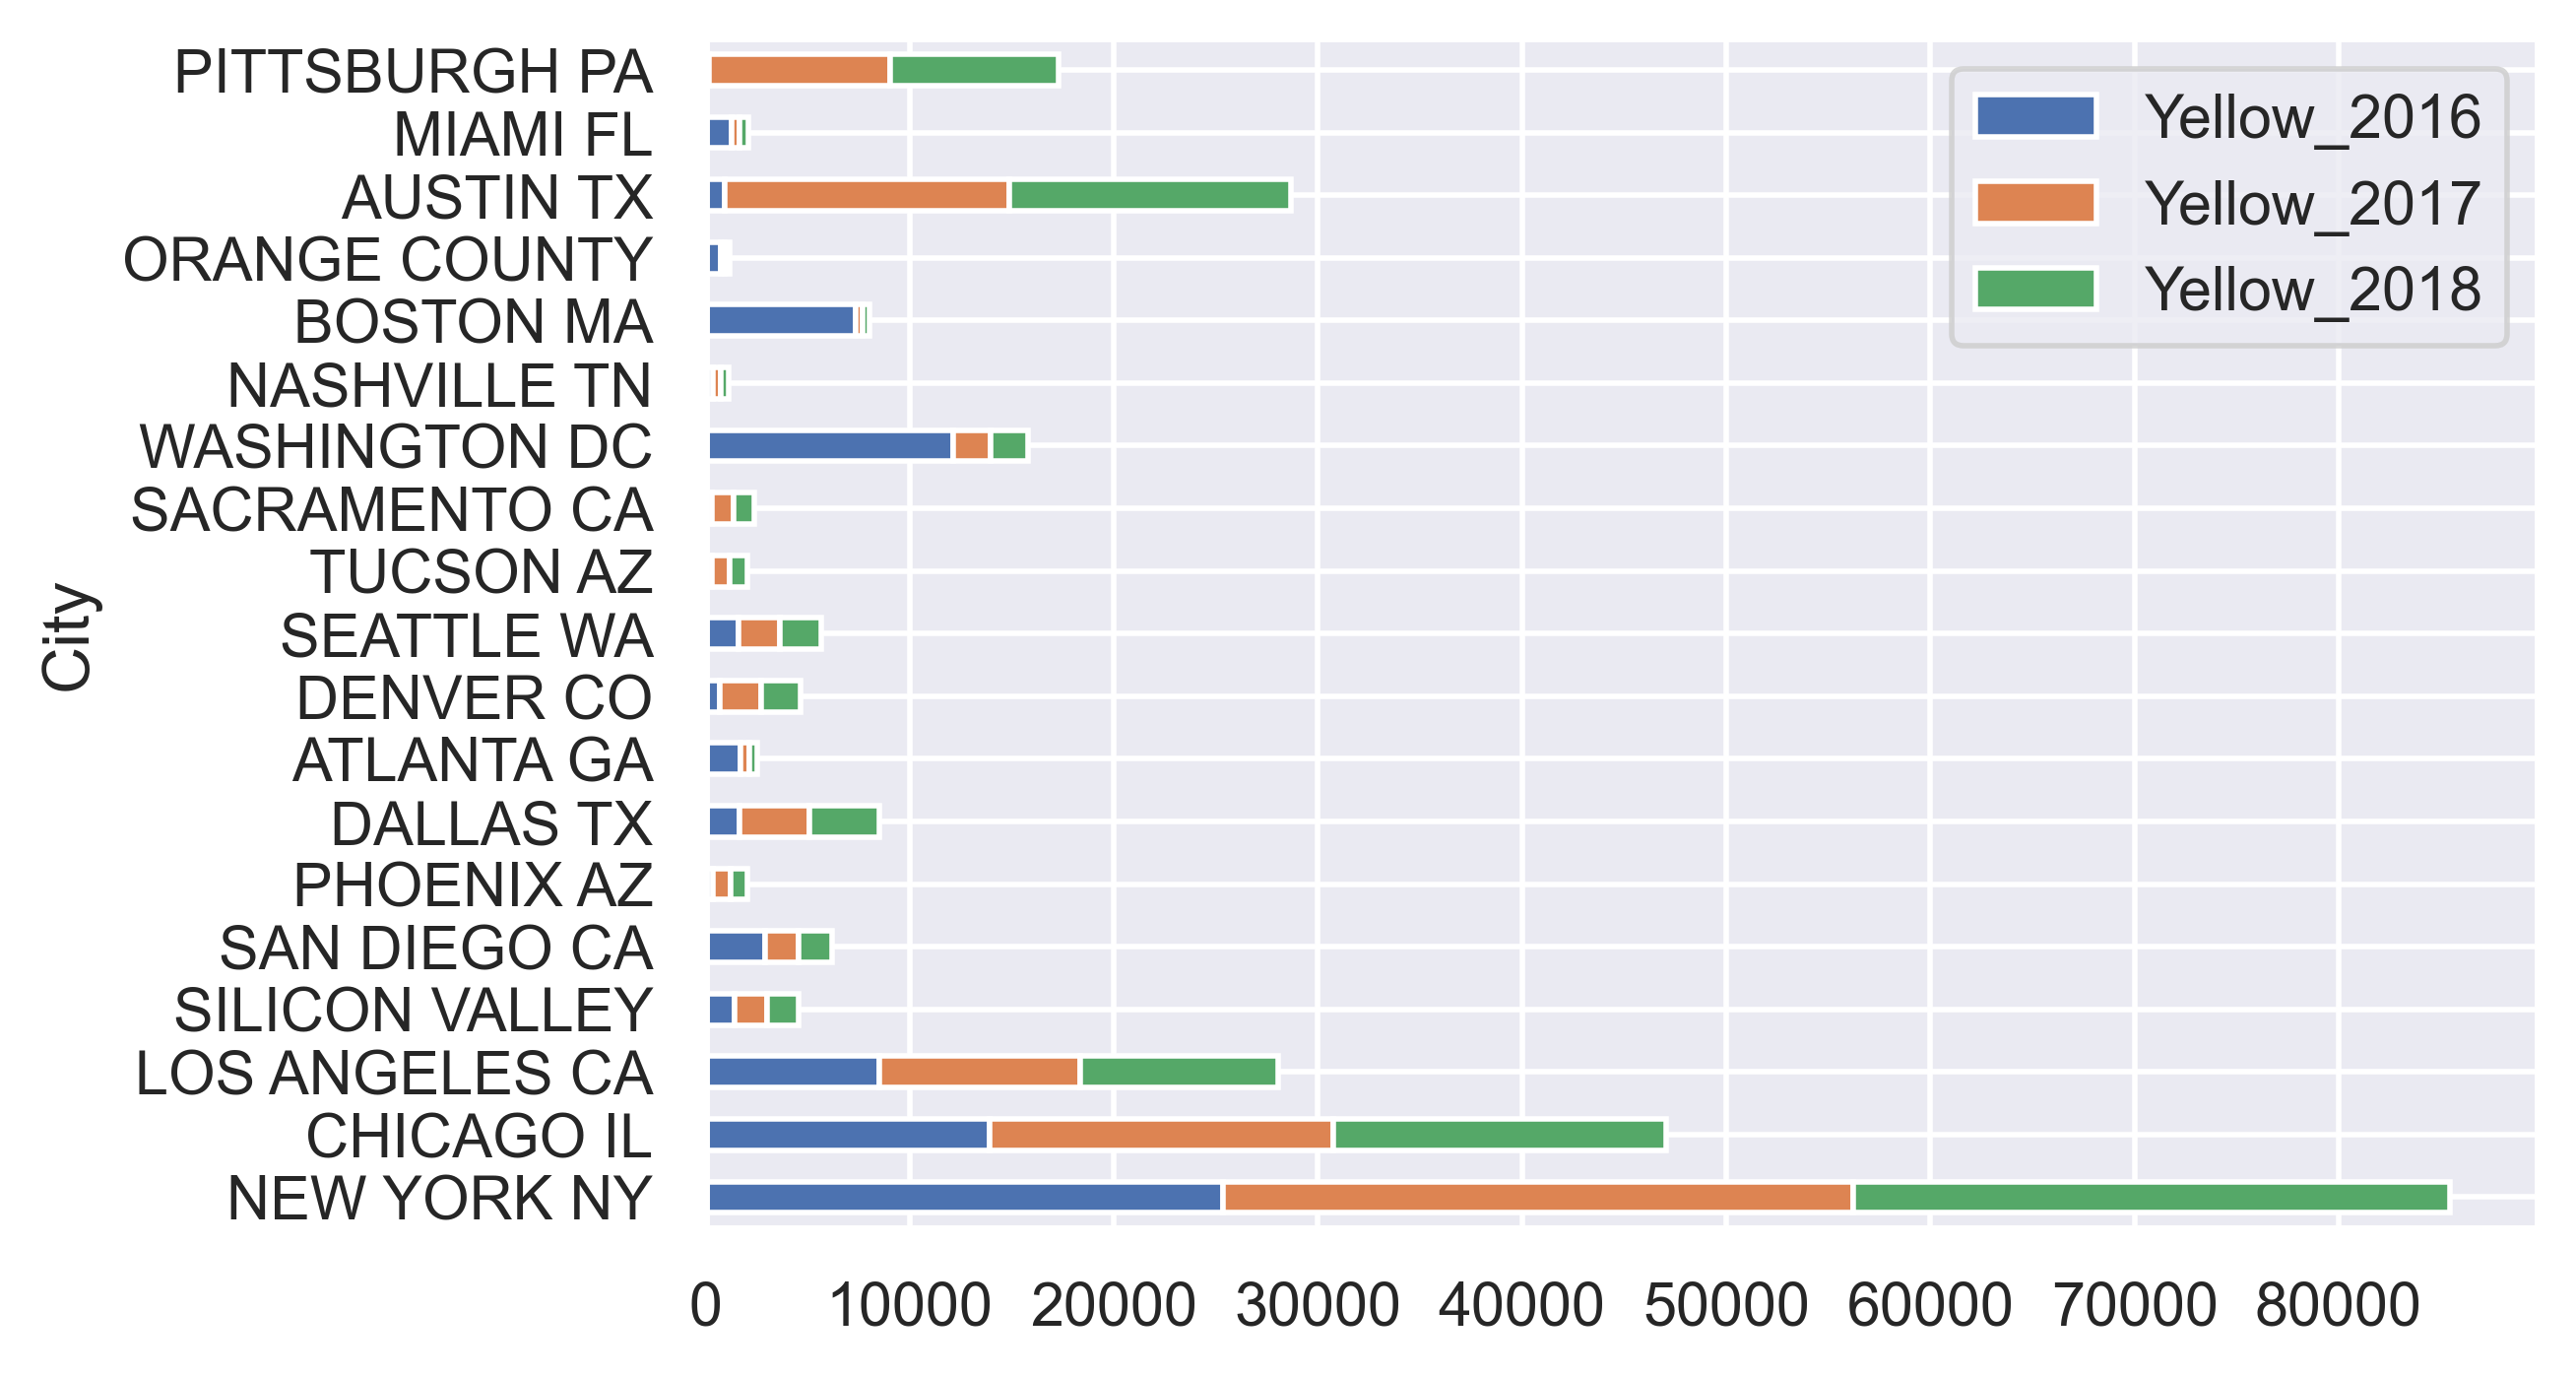

In [57]:
    #create DataFrame based on Yellow Cab's Annual Transactions (2016, 2017, 2018)
pd.DataFrame(
    {   
        'City':         list(Counter(main_dataset[
                                    (main_dataset['Company'].isin(['Yellow Cab'])) & 
                                    (main_dataset['Date of Travel'] < datetime.datetime(2017,12,31))].City
                                    )), 
        'Yellow_2016': list(Counter(main_dataset[
                                    (main_dataset['Company'].isin(['Yellow Cab'])) & 
                                    (main_dataset['Date of Travel'] < datetime.datetime(2016,12,31))].City
                                    ).values()),
        'Yellow_2017': list(Counter(main_dataset[
                                    (main_dataset['Company'].isin(['Yellow Cab'])) & 
                                    (main_dataset['Date of Travel'] > datetime.datetime(2016,12,31)) &
                                    (main_dataset['Date of Travel'] < datetime.datetime(2017,12,31))].City
                                    ).values()),
        'Yellow_2018': list(Counter(main_dataset[
                                    (main_dataset['Company'].isin(['Yellow Cab'])) & 
                                    (main_dataset['Date of Travel'] > datetime.datetime(2017,12,31)) &
                                    (main_dataset['Date of Travel'] < datetime.datetime(2018,12,31))].City
                                    ).values())
    }
).plot.barh(x = 'City', stacked = True) #plot stacked Bar graph

        

<AxesSubplot:ylabel='City'>

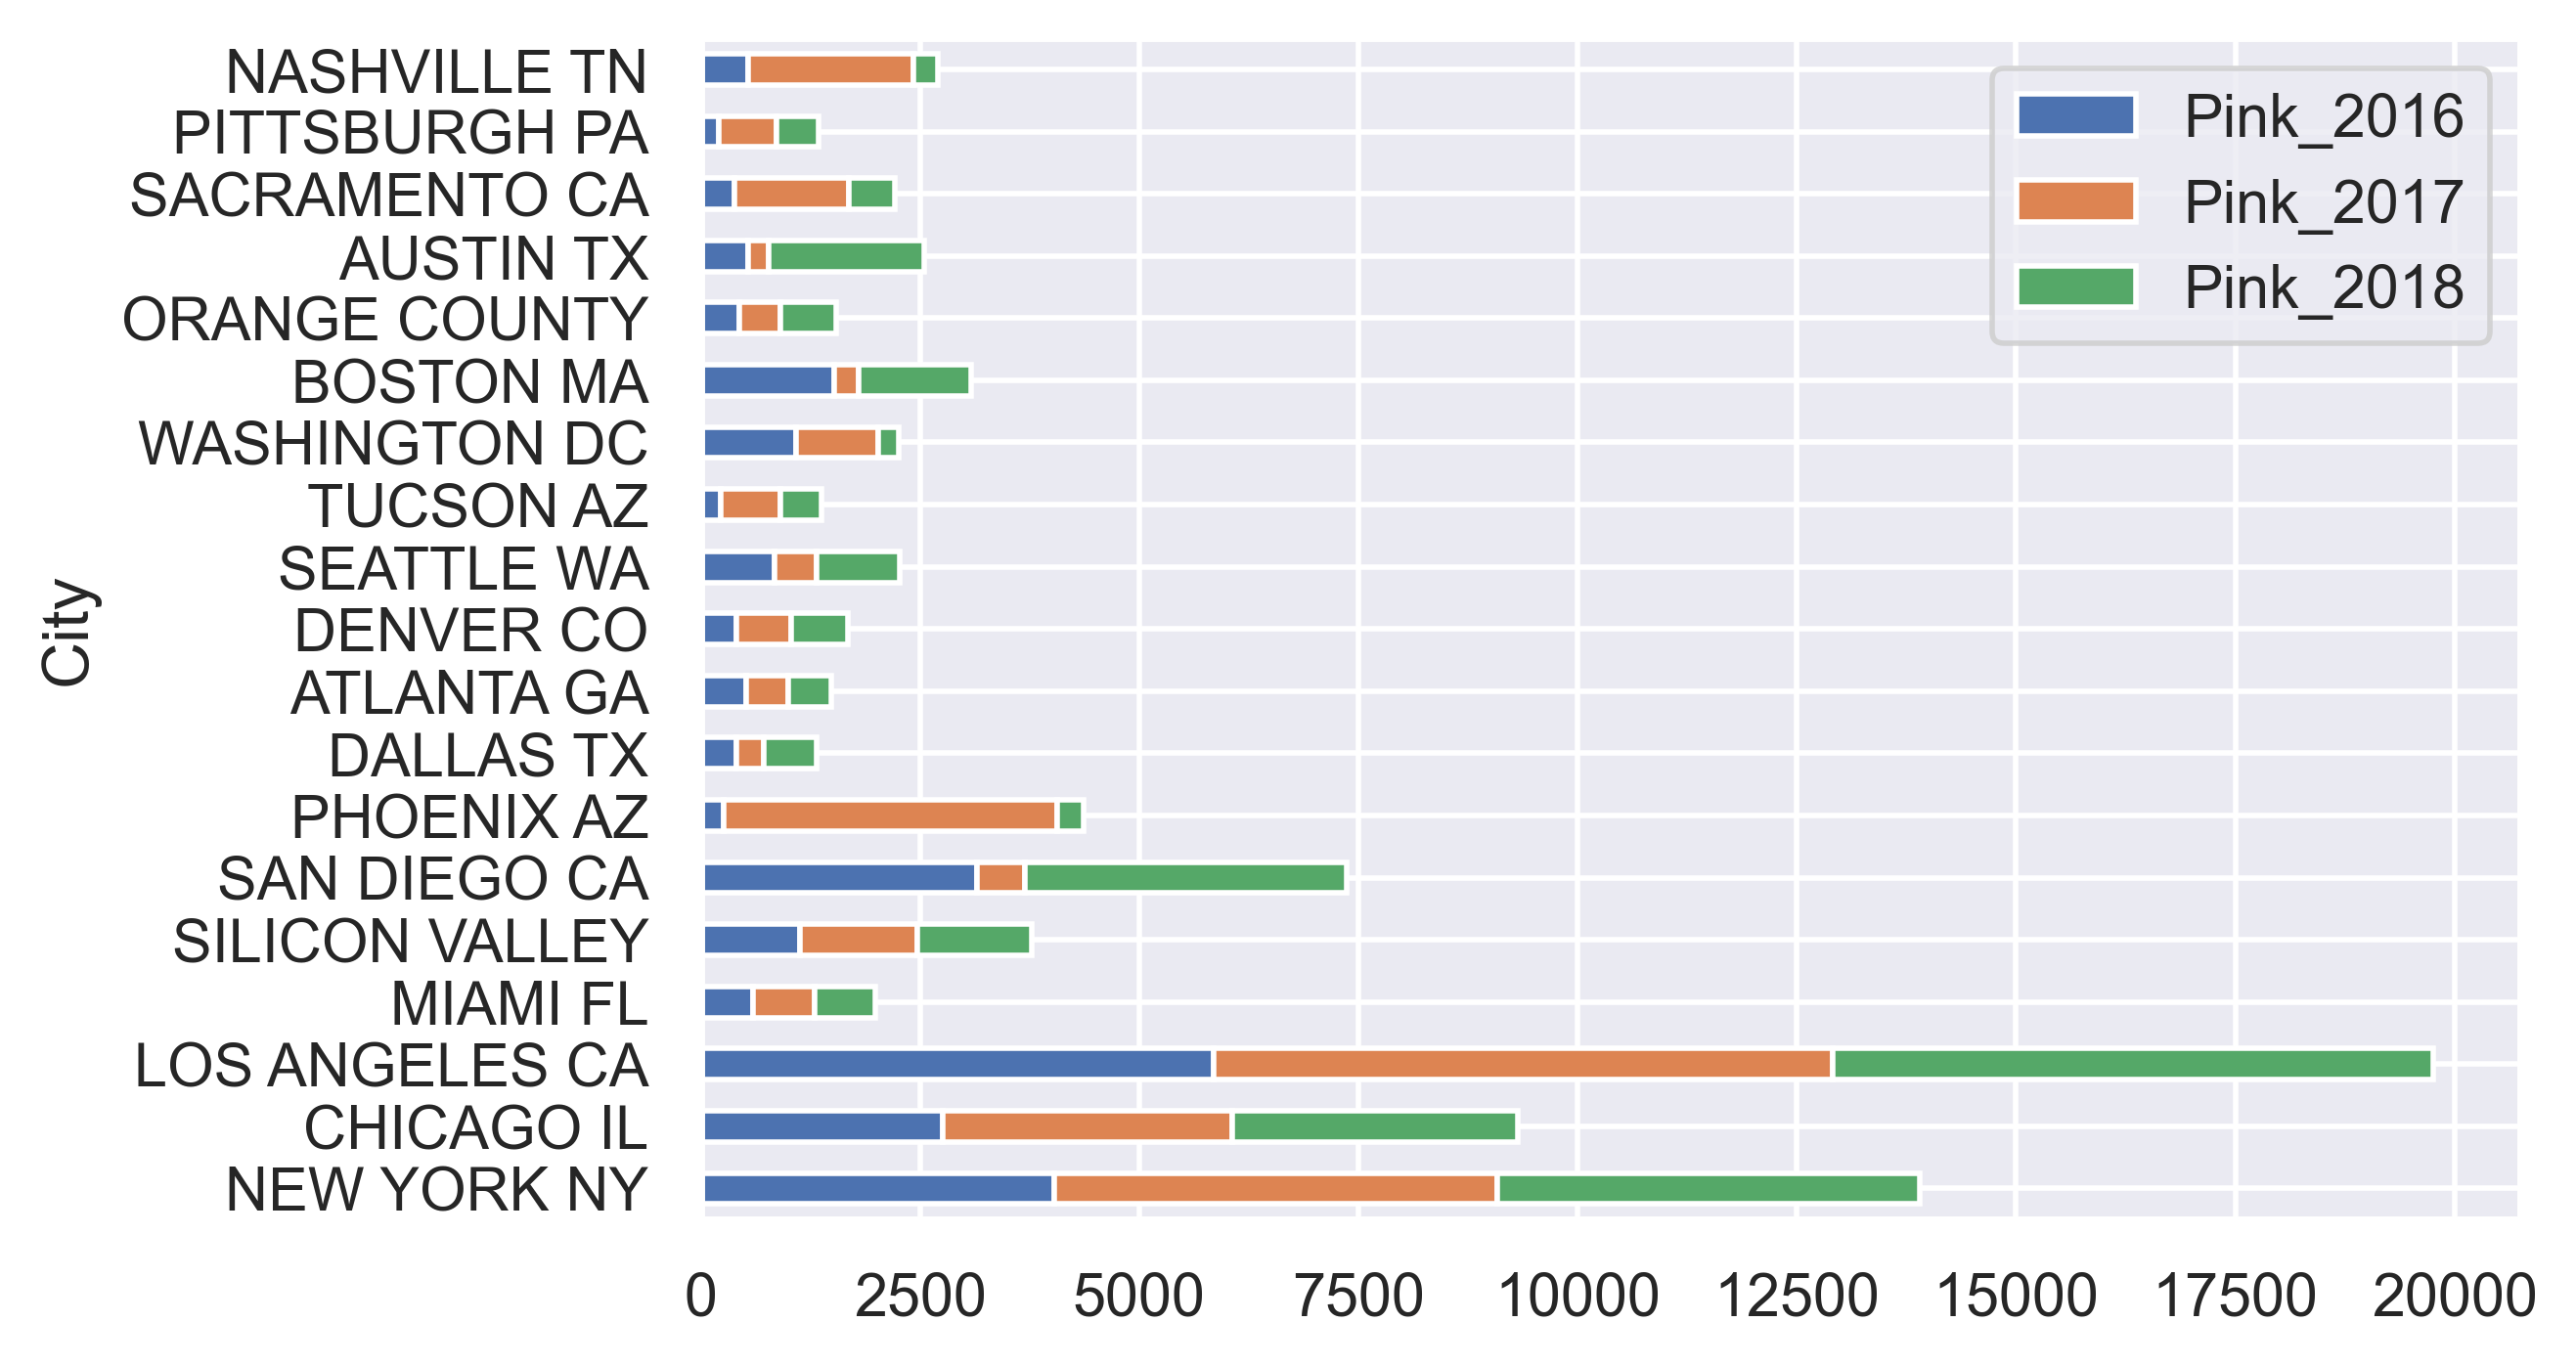

In [51]:
#create DataFrame based on Pink Cab's Annual Transactions (2016, 2017, 2018)
pd.DataFrame(
    {   
        'City':         list(Counter(main_dataset[
                                    (main_dataset['Company'].isin(['Pink Cab'])) & 
                                    (main_dataset['Date of Travel'] < datetime.datetime(2017,12,31))].City
                                    )), 
        'Pink_2016': list(Counter(main_dataset[
                                    (main_dataset['Company'].isin(['Pink Cab'])) & 
                                    (main_dataset['Date of Travel'] < datetime.datetime(2016,12,31))].City
                                    ).values()),
        'Pink_2017': list(Counter(main_dataset[
                                    (main_dataset['Company'].isin(['Pink Cab'])) & 
                                    (main_dataset['Date of Travel'] > datetime.datetime(2016,12,31)) &
                                    (main_dataset['Date of Travel'] < datetime.datetime(2017,12,31))].City
                                    ).values()),
        'Pink_2018': list(Counter(main_dataset[
                                    (main_dataset['Company'].isin(['Pink Cab'])) & 
                                    (main_dataset['Date of Travel'] > datetime.datetime(2017,12,31)) &
                                    (main_dataset['Date of Travel'] < datetime.datetime(2018,12,31))].City
                                    ).values())
    }
).plot.barh(x = 'City', stacked = True)


CONCLUSION

Pink cab is still in transition of joining the market, evident by its smaller market share in comparison to Yellow Cab. This is also evident by its lower price per KM, to serve as an incentive for market disruption.

Regardless, based on the analysis, we recommend the best investment to be in Yellow Cab, which demonstrates longer experience in the market sector, with a loyal clientele, & greater margins per prospective transaction. 


In [ ]:
                    #FAILED TRIALS
# type(cab_data_copy.loc[:,'Date of Travel'][0].item())

# for i in range(len(cab_data_copy)):
#     print(type(cab_data_copy.loc[i,'Date of Travel']))
# print(cab_data_copy.loc[0,'Date of Travel'])

# type(cab_data_copy.loc[4,'Date of Travel'])

# cab_data_copy.loc[4,'Date of Travel']

# for i in range(len(cab_data_copy)):#Iterate through all values in the DataFrame
#     #replace Date of Travel values

# for i in range(len(cab_data_raw_dates)):
#     cab_data_raw_dates[i,'b'] = start_date + datetime.timedelta(cab_data_raw_dates.loc[i,'a'].item() - 42371)
    

# def date_calculate(ref):
#     for i in range(len(cab_data_copy)):
#             start_date + datetime.timedelta(cab_data_dates.loc[i,'a'].item() - 42371)

# print(type(cab_data_dates[i]))

# for i in range(len(cab_data_dates)):#Iterate through all values in the DataFrame
# #     cab_data_dates.replace(to_replace = cab_data_dates.loc[i],
# #                          #Compare Date of Travel against Start Date & increment accordingly
# #                          value = start_date + datetime.timedelta(cab_data_dates.loc[i].item() - 42371),
# #                          #Replace value in DataFrame
# #                         inplace = True)
#                         print(type(cab_data_dates[i]))
# cab_data_dates.loc[:,'a']
#     cab_data_copy.replace(to_replace = cab_data_copy.loc[i,'Date of Travel'],
#                          #Compare Date of Travel against Start Date & increment accordingly
#                          value = 'x',
# #                           start_date + datetime.timedelta(cab_data_copy.loc[i,'Date of Travel'].item() - 42371),
#                          #Replace value in DataFrame
#                         inplace = True)

# print(start_date + datetime.timedelta(cab_data.loc[3,'Date of Travel'].item() - 42371)) 

# type(cab_data_copy.loc[5,'Date of Travel'])
# cab_data.replace(to_replace = cab_data.loc[5,"Date of Travel"],
#                        value = start_date + datetime.timedelta(cab_data.loc[3,'Date of Travel'].item() - 42371),
#                        inplace = True)

# cab_data.loc[5]

# print(cab_data_copy.strftime("%d-%m-%y"))

    #Test - convert Users str to int & increment by 1
#city_list_copy = city_list
# print(city_list_copy.loc[:,'Users'][0])
# print(type(city_list_copy.loc[:,'Users'][0]))
# print(int(city_list_copy.loc[:,'Users'][0].replace(',','')))

# for i in range(len(city_list_copy)):
#     city_list_copy.loc[i].replace(to_replace = city_list_copy.loc[:,'City'][i],
#                                   value = int(city_list_copy.loc[:,'Users'][i].replace(',','')) + 1,
#                                   inplace = True )
#     print(city_list_copy.loc[i])



    #Adding a column to end of Dataset 
# main_dataset_copy['Price per KM'] = main_dataset_copy['Price Charged'] / main_dataset_copy['KM Travelled']


    #merging describ() outputs.
# z = pd.merge(
#     x,
#     y,
#     left_index = True,
#     right_index = True,
#     suffixes = ('Yellow','Pink'),
#     validate = 'one_to_one'
# )
    


# for x in range(len(yellow_cab)):
#     # h = main_dataset['Date of Travel'].year == 2016
#     if yellow_cab['Date of Travel'][x].year == '2016': #and main_dataset['Date of Travel'][x].year == 2016:
#         yellow_2016.append(main_dataset.loc[x])
#     if x.year == 2017:
#         count_y +=1
#     if x.year == 2018:
#         count_z +